<a href="https://colab.research.google.com/github/abhishek8g/AI-Project/blob/main/Cat_and_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cat='/content/drive/MyDrive/Dataset/cat'

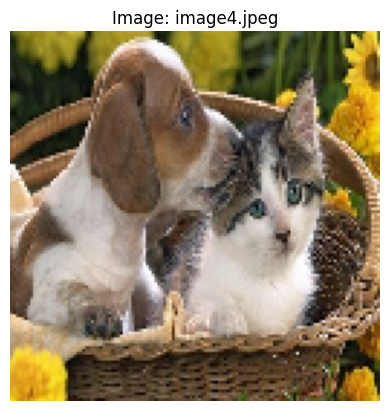

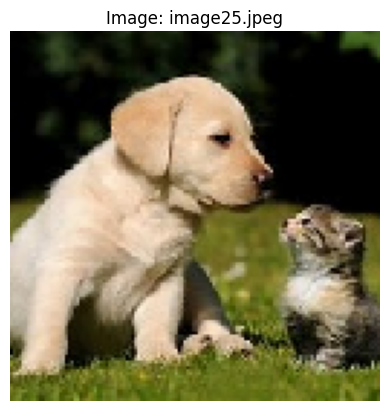

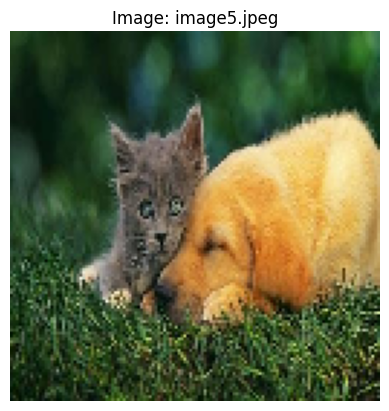

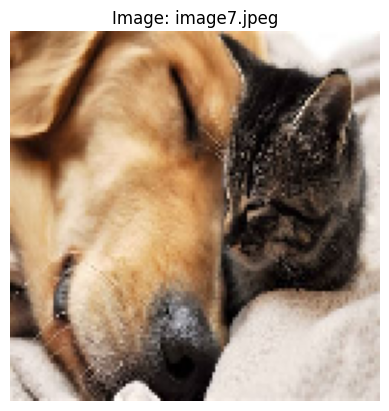

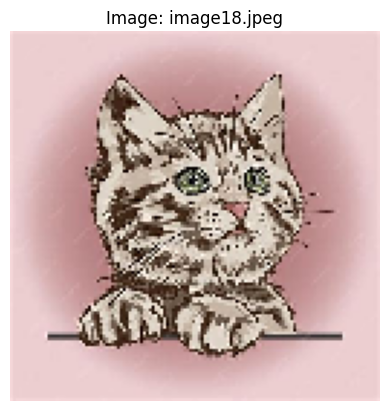

In [3]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/Dataset/cat'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, RandomFlip
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
# Paths
base_dir = "/content/drive/MyDrive/Dataset"
train_dir = os.path.join(base_dir, "Train")
test_dir = os.path.join(base_dir, "Test")


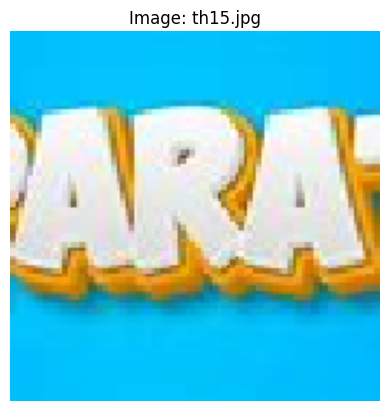

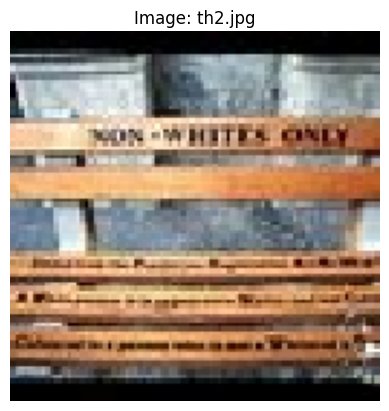

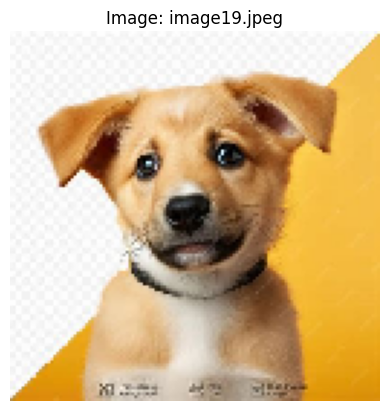

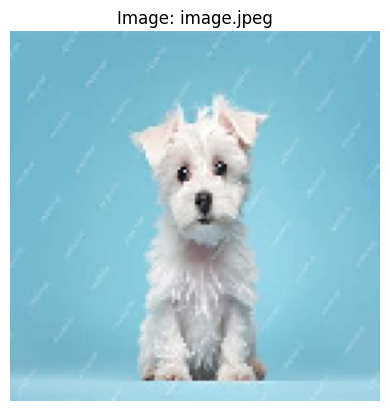

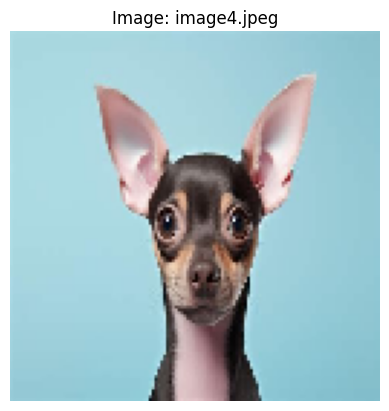

In [6]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/Dataset/dog'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

In [7]:
# Paths
base_dir = "/content/drive/MyDrive/Dataset"
cat_dir = os.path.join(base_dir, "cat")
dog_dir = os.path.join(base_dir, "dog")

In [8]:
# Image settings
img_size = (150, 150)
batch_size = 32

# Data generators
cat_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
dog_datagen = ImageDataGenerator(rescale=1./255)

cat_data = cat_datagen.flow_from_directory(
    cat_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

dog_data = dog_datagen.flow_from_directory(
    dog_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [9]:
# Import necessary libraries for CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths for your dataset
# Adjust these paths if your dog dataset is not in the same parent directory as cat
base_dir = '/content/drive/MyDrive/Dataset'
train_dir = base_dir
validation_dir = base_dir # For simplicity, using same directory for train/validation. In a real scenario, split your dataset.

# Prepare data generators
# Rescale images to 1./255 for normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # 80% for training, 20% for validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128), # Consistent with your image loading in the original notebook
    batch_size=32,
    class_mode='binary', # 'binary' for 2 classes (cat/dog)
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10, # You can adjust the number of epochs
    validation_data=validation_generator
)

model.summary()

Found 325 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 1/11 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.6875 - loss: 0.6853

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6487 - loss: 0.8803 - val_accuracy: 0.7000 - val_loss: 0.6215
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7264 - loss: 0.6090 - val_accuracy: 0.7000 - val_loss: 0.5974
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7111 - loss: 0.6049 - val_accuracy: 0.7000 - val_loss: 0.6094
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7234 - loss: 0.5834 - val_accuracy: 0.7000 - val_loss: 0.6259
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6630 - loss: 0.6238 - val_accuracy: 0.7000 - val_loss: 0.6387
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7017 - loss: 0.5672 - val_accuracy: 0.7375 - val_loss: 0.6083
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7088 - loss: 0.5901 - val_accuracy: 0.7625 - val_loss: 0.5626
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7108 - loss: 0.5355 - val_accuracy: 0.7625 - val_loss: 0.5285
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

In [10]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d5599100f574464119ddae1a5bdc2774874bc8cdd2a1819c9f46880bf7c87baf
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from lime import lime_image
import matplotlib.pyplot as plt

# Choose an image to explain (e.g., a cat image from your dataset)
# Make sure to replace with an actual path to an image in your dataset
# CORRECTED: Provide the path to an actual image file, not the directory
img_path = '/content/drive/MyDrive/Dataset/cat/1.jpg' # Example image path - REPLACE WITH A REAL IMAGE FILE
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array = img_array / 255.0 # Normalize as done during training

# Function for LIME to predict probabilities
# LIME expects a function that takes a numpy array of images and returns a 2D array of predictions (probabilities)
def predict_fn(images):
    # Ensure images are normalized to 0-1 range
    # LIME passes normalized images (0-1 range) if hide_color=0, but it's good practice to ensure
    normalized_images = images # LIME with hide_color=0 already normalizes to 0-1
    predictions = model.predict(normalized_images)
    # For binary classification, LIME expects two columns (e.g., [prob_class_0, prob_class_1])
    # Assuming 0 is 'cat' and 1 is 'dog' based on class_mode='binary' and flow_from_directory default ordering
    return np.hstack([1 - predictions, predictions])

# Initialize LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Get explanation for the image
# top_labels: number of labels to explain, here 1 (for binary classification result)
# hide_color: the color used to hide parts of the image
# num_samples: number of perturbed samples to generate for explanation
explanation = explainer.explain_instance(
    img_array[0].astype('double'), # LIME expects a single image (no batch dimension) and double type
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Get the image and mask for the top predicted class
# explanation.top_labels[0] will be either 0 (cat) or 1 (dog) based on the prediction
predicted_class_index = explanation.top_labels[0]

temp, mask = explanation.get_image_and_mask(
    predicted_class_index,
    positive_only=False, # Show both positive and negative contributions
    num_features=5, # Number of superpixels to highlight
    hide_rest=True
)

# Visualize the explanation
plt.imshow(img_array[0])
plt.title("Original Image")
plt.axis('off')
plt.show()

# LIME's `temp` is the masked image. `temp / 2 + 0.5` was likely intended to rescale from a -1 to 1 range.
# Since we used hide_color=0 and our predict_fn normalizes to 0-1, `temp` will be in the 0-1 range.
# No need to rescale `temp` if hide_color is 0.
plt.imshow(temp)
plt.imshow(mask, cmap='viridis', alpha=0.5)
plt.title(f"LIME Explanation for Class: {predicted_class_index} ({'dog' if predicted_class_index == 1 else 'cat'})") # Add class name to title
plt.axis('off')
plt.show()

# You can also get more detailed segment-wise explanations
# plt.imshow(img_array[0])
# plt.imshow(explanation.get_image_and_mask(predicted_class_index, positive_only=True)[0] / 2 + 0.5) # Adjust scaling if needed
# plt.imshow(explanation.get_image_and_mask(predicted_class_index, positive_only=True)[1], cmap='jet', alpha=0.5)
# plt.show()

In [12]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 6.5 MB/s eta 0:00:00
